In [51]:
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import numpy as np

In [4]:
data = torch.load('../tmp/dict.pth')

0


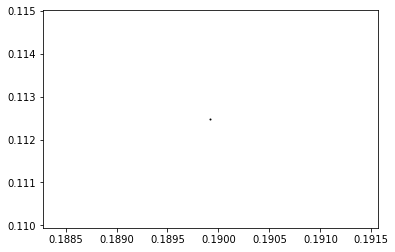

In [71]:
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.count = 0
        self.stream = self.data_stream()
        
        self.data = data

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, frames=[1,2,3,4], interval=100, 
                                          init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, s, c = next(self.stream).T
        
        self.scat = self.ax.scatter(x, y, c=c, s=s, vmin=0, vmax=1,
                                    cmap="jet", edgecolor="k")
        # self.ax.axis([-10, 10, -10, 10])
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        print(self.count)
        key = list(data.keys())[self.count]
        self.count += 1
        _data = data[key]
        positive_dict = _data['positive_dict']
        pos_head = positive_dict['head'].tolist()[0][0]
        pos_tail = positive_dict['tail'].tolist()[0][0][0]
        pos_res = positive_dict['res'].tolist()[0][0][0]
        
        yield np.c_[pos_head[0], pos_head[1], 1, 2]

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        self.scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
        # Set colors..
        self.scat.set_array(data[:, 3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,


a = AnimatedScatter()
plt.show()

In [79]:
fig = plt.figure(figsize=(10, 10))
first_flag = True

for key in data.keys():
    _data = data[key]
    print(key)
    positive_dict = _data['positive_dict']
    pos_head = positive_dict['head'].tolist()[0][0]
    pos_tail = positive_dict['tail'].tolist()[0][0][0]
    pos_res = positive_dict['res'].tolist()[0][0][0]
    # print(pos_tail)
    plt.scatter(pos_head[0], pos_head[1], color='gray')
    plt.scatter(pos_tail[0], pos_tail[1], color='black')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.scatter(pos_res[0], pos_res[1], color='red')
    plt.savefig('../tmp/figures/%d.png' % key)
    plt.clf()


0
6
8
12
18
20
26
28
34
38
40
46
50
54
56
60
66
68
72
78
80
84
90
92
96
100


<Figure size 720x720 with 0 Axes>

In [4]:
import cv2
import os

image_folder = '../tmp/figures'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [7]:
from IPython.display import Video

Video("video.avi")
